# Group 32 Final Project

### Data Exploration

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA

In [5]:
# reading the test dataset
train=pd.read_csv("train.csv") 

Let's have a look on the data we got:

In [6]:
print(train.shape)

(21931, 22)


Wev'e got 21 (22 rows with label coloumn) features and 21931 rows in train set.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21931 entries, 0 to 21930
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21858 non-null  float64
 1   1       21842 non-null  object 
 2   2       21875 non-null  object 
 3   3       21826 non-null  float64
 4   4       21906 non-null  float64
 5   5       21871 non-null  float64
 6   6       21786 non-null  object 
 7   7       21911 non-null  float64
 8   8       21931 non-null  int64  
 9   9       21892 non-null  float64
 10  10      21828 non-null  float64
 11  11      21860 non-null  float64
 12  12      21918 non-null  object 
 13  13      21891 non-null  float64
 14  14      17946 non-null  float64
 15  15      21832 non-null  float64
 16  16      21921 non-null  object 
 17  17      21830 non-null  float64
 18  18      21847 non-null  object 
 19  19      4250 non-null   object 
 20  20      21930 non-null  float64
 21  label   21931 non-null  int64  
dty

We can see for each feature how much non-null values it got, in addition we can see that we have categorial and numerical values.

In [8]:
print(train.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', 'label'],
      dtype='object')


This is the list of the features wev'e got

In [9]:
print("The number of Null values in each feature at the Train data:")
print(train.isnull().sum())
print('the toatl number of missing values:',sum(train.isnull().sum()))

The number of Null values in each feature at the Train data:
0           73
1           89
2           56
3          105
4           25
5           60
6          145
7           20
8            0
9           39
10         103
11          71
12          13
13          40
14        3985
15          99
16          10
17         101
18          84
19       17681
20           1
label        0
dtype: int64
the toatl number of missing values: 22800


In [10]:
# Percentage of null in any column
print(train.isnull().sum()/train.shape[0]) 




0        0.003329
1        0.004058
2        0.002553
3        0.004788
4        0.001140
5        0.002736
6        0.006612
7        0.000912
8        0.000000
9        0.001778
10       0.004697
11       0.003237
12       0.000593
13       0.001824
14       0.181706
15       0.004514
16       0.000456
17       0.004605
18       0.003830
19       0.806210
20       0.000046
label    0.000000
dtype: float64


As we can see we have 80% of nulls in feature 19, we probbably gonna omit it, in feature 14 we have 18% nulls, and in the other cells it looks ok.

In [11]:
print(train.isnull().any())

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8        False
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
label    False
dtype: bool


We can see that only in feature 8 and in label we haven't got any non values

In [12]:
print(train.describe())

                  0             3              4             5             7  \
count  21858.000000  21826.000000   21906.000000  21871.000000  21911.000000   
mean       2.709443      4.204116    1383.256596      6.589936    157.450596   
std        2.976380      3.752786    3030.087625      0.921664     83.121658   
min        1.000000    -11.138786   -8019.000000      3.776680     10.000000   
25%        1.000000      1.605409      80.000000      5.901285     80.000000   
50%        2.000000      4.190917     470.000000      6.517118    160.000000   
75%        3.000000      6.811247    1472.750000      7.246177    210.000000   
max       51.000000     17.647593  102127.000000     10.303540    310.000000   

                  8             9            10            11            13  \
count  21931.000000  21892.000000  21828.000000  21860.000000  21891.000000   
mean       0.542429    256.617674      0.608164    268.845882      2.063816   
std        0.498208     71.635412      1.8

We can see the summary of statistics pertaining of the numerical features

<AxesSubplot:ylabel='label'>

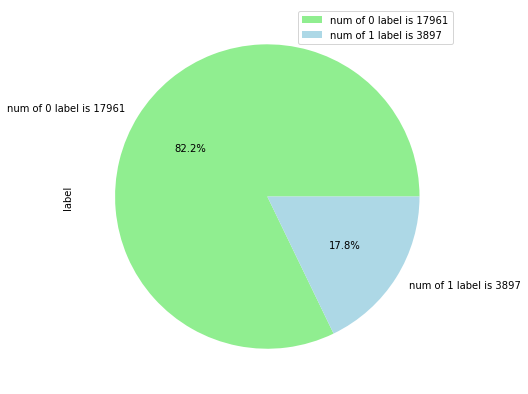

In [13]:
res = train.groupby('label').count()
num0 = res['0'][0]
num1 = res['0'][1]
pie_df = pd.DataFrame({'label': [num0,num1]},index=['num of 0 label is %s' %num0,'num of 1 label is %s' %num1])
pie_df.plot.pie(y='label', figsize=(7, 7),colors=['lightGreen', 'lightblue'],autopct='%1.1f%%' )

We can see that our labels are not balanced, we have much more 0 labels than 1 labels. That might means that our model will practice more on label 0 and will be more accurate on 0 observations than on 1.

In [14]:
# Remove missing values for the visualization
train_no_null = train.dropna() 
# Features array
x = train_no_null.loc[:,:'20']  
# Data frame of label column
y = pd.DataFrame(train['label'])  
# Creating list of the indexes of numeric columns
numeric_columns=list(x.columns[x.dtypes != 'object'])
# Creating list of the indexes of categoric columns
categorial_columns=list(x.columns[x.dtypes == 'object'])
# Searching for duplicate rows in the features
duplicate_rows=sum(x.duplicated())
if duplicate_rows>0:
    print("we got %d duplicate rows!" %duplicate_rows)
else:
    print("We don't have duplicate rows!")



We don't have duplicate rows!


In [15]:
def numerical_visualization(numeric_columns):
     for col in numeric_columns:
        plt.figure(figsize = (25,5))
        plt.subplot(132)
        x[col].hist()
        plt.title('Histogram plot for feature %s' %col)
        plt.xlabel('feature value')
        plt.subplot(133)
        train_no_null[[col]].boxplot()
        plt.title('Boxplot for feature %s' %col)
        plt.show()
        
def categorial_visualization(categorial_columns):
    for col in categorial_columns:
        fig, ax =plt.subplots(figsize=(18,5))
        sns.countplot(x=x[col])
        plt.title('Plots for feature'+' '+col)
        plt.xlabel('Categories')
        plt.show()

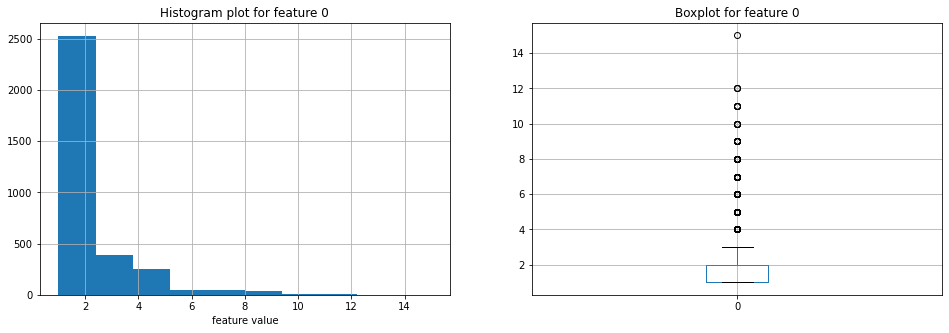

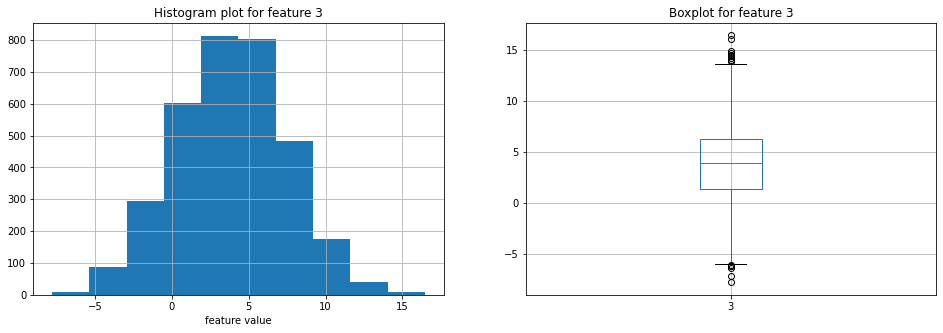

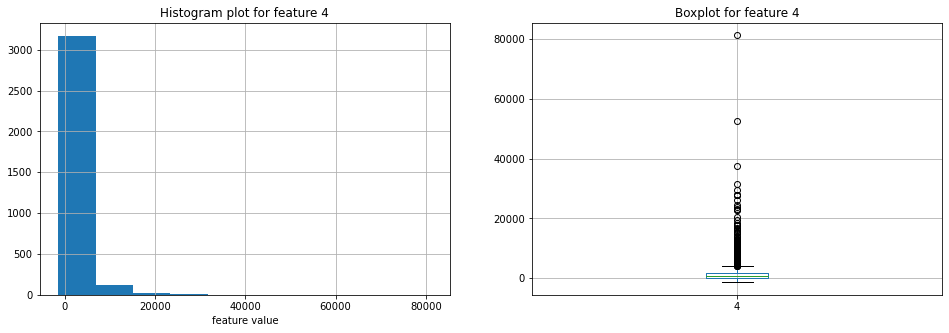

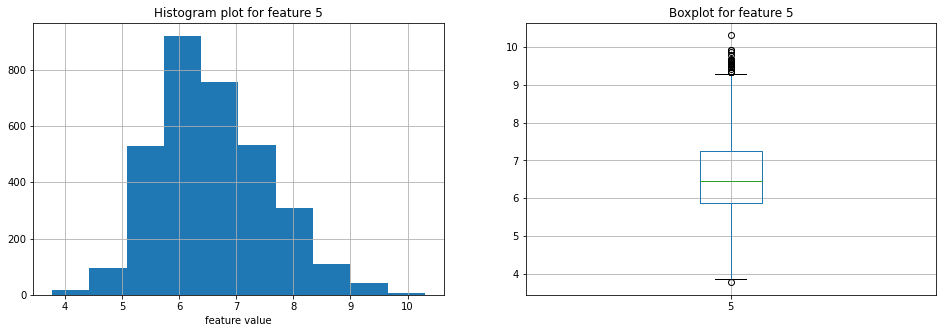

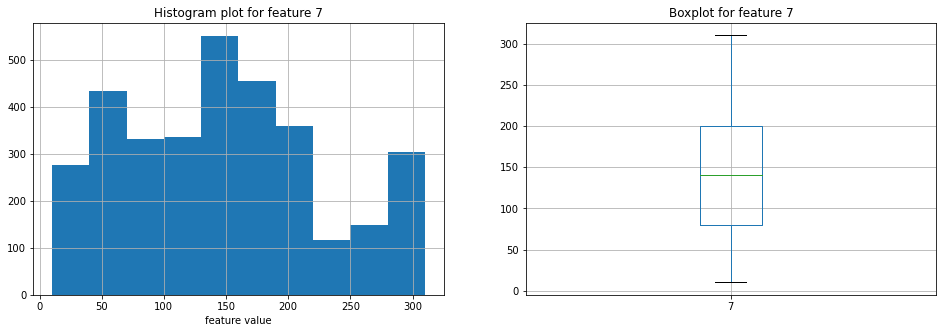

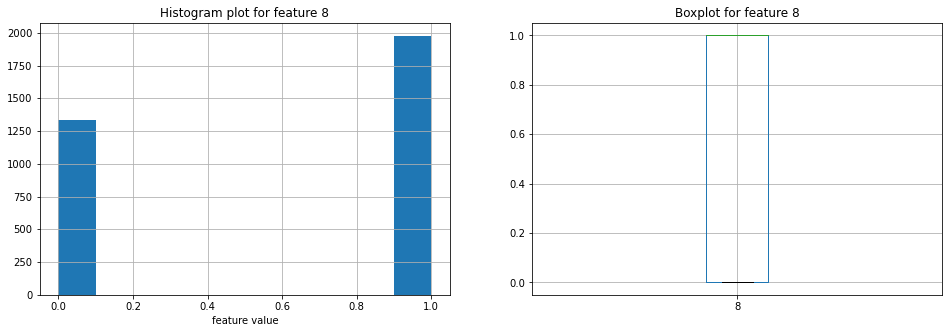

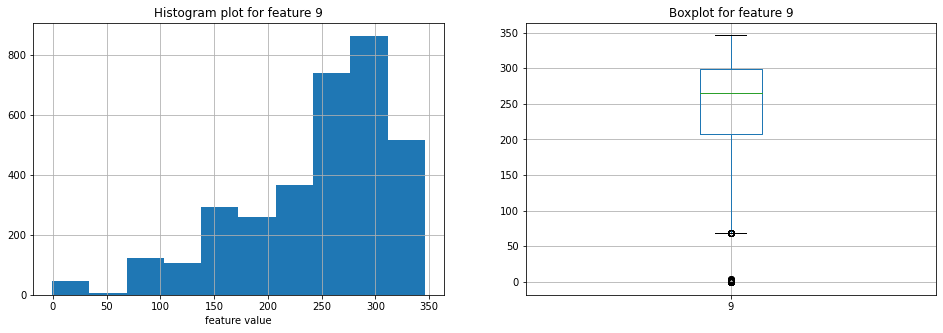

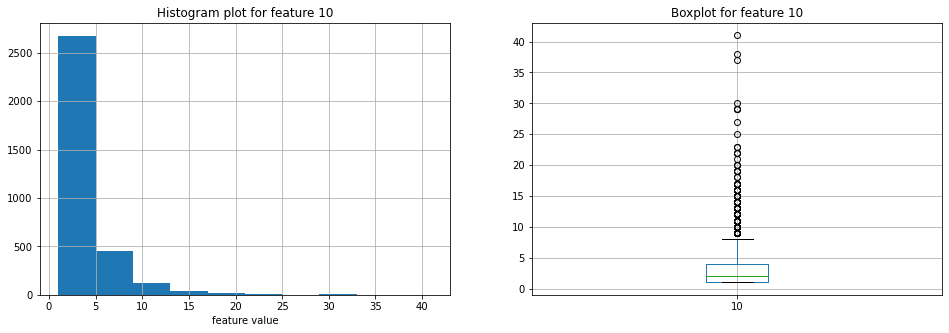

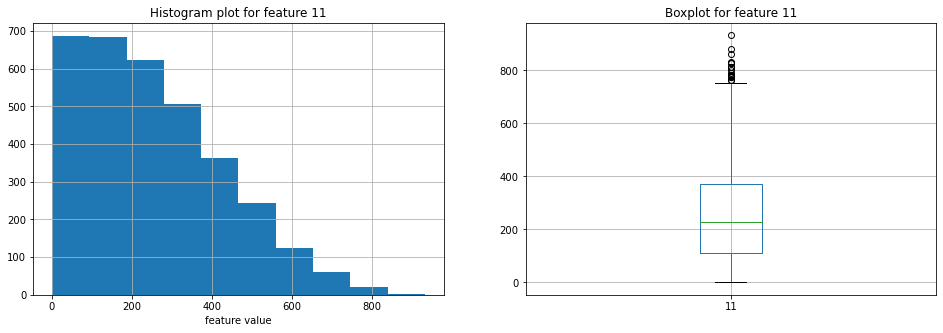

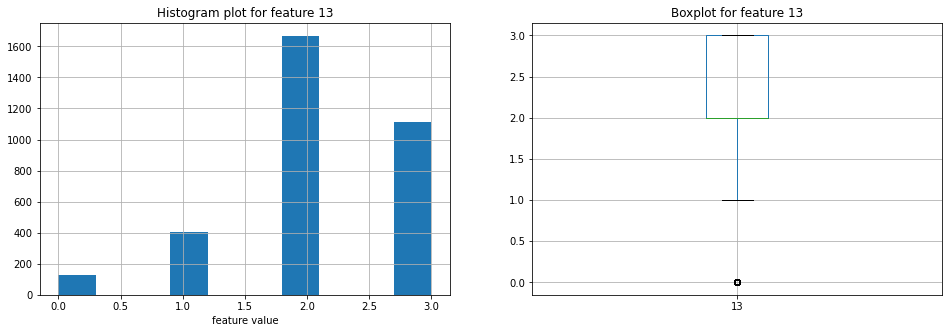

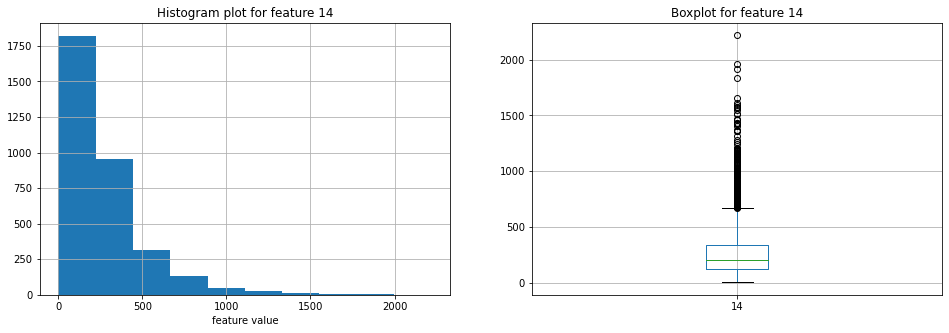

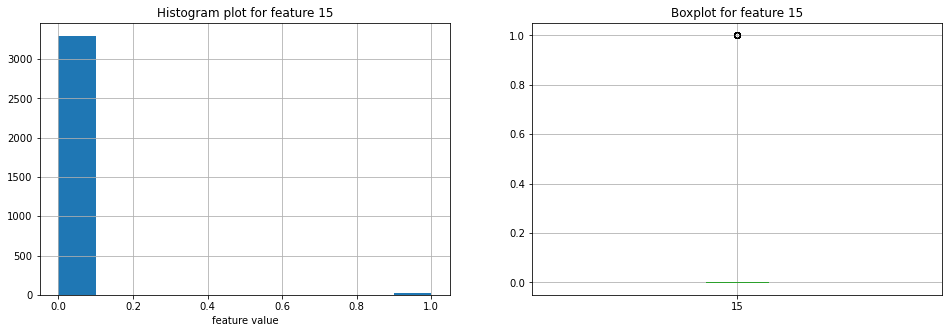

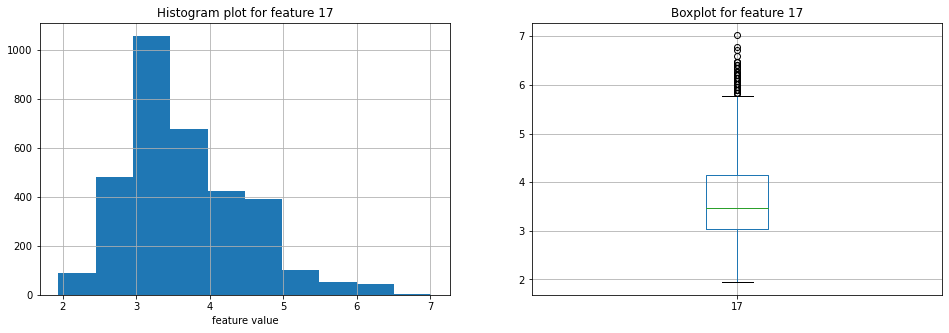

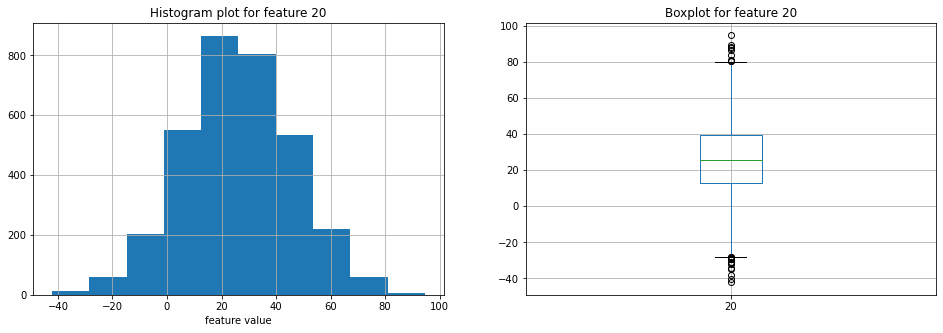

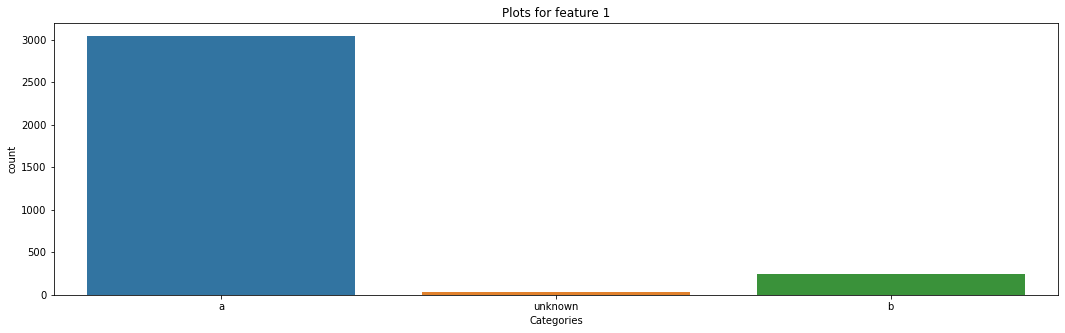

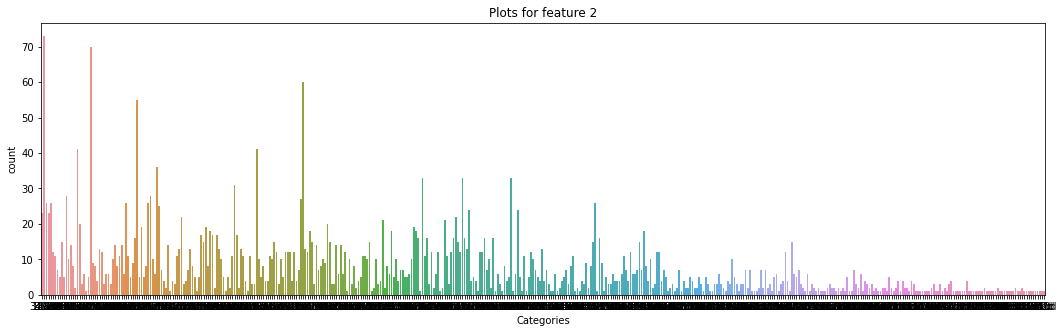

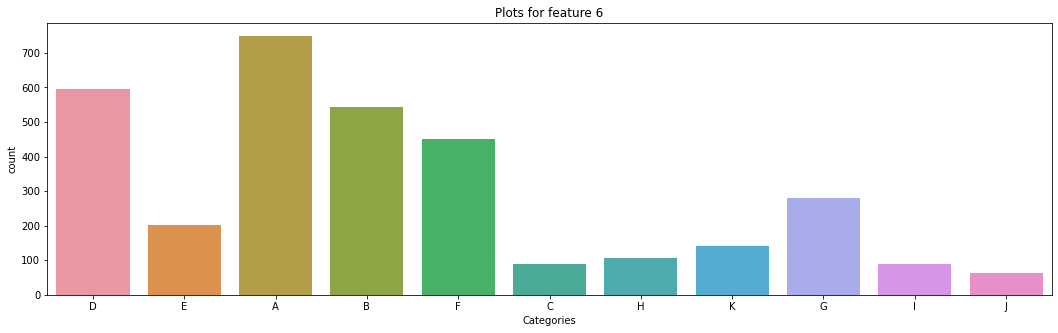

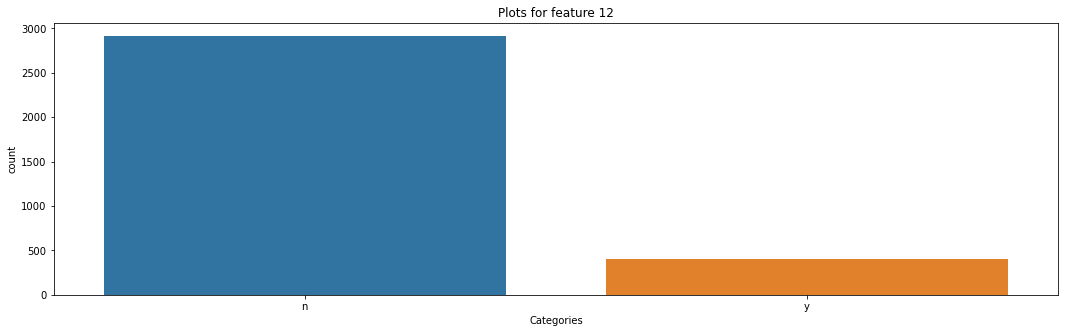

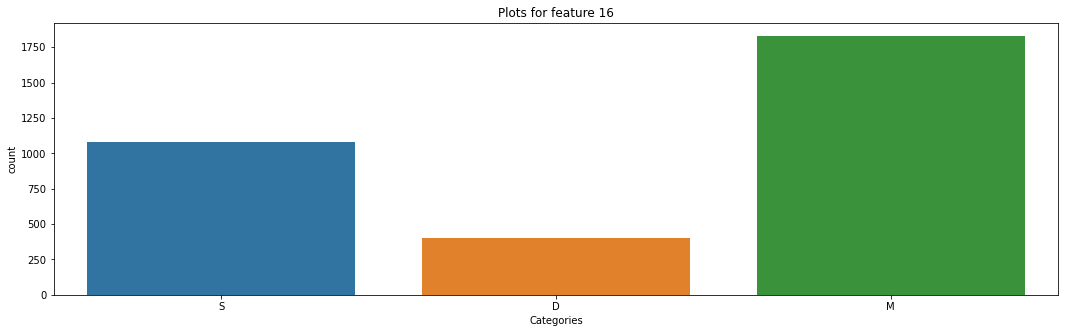

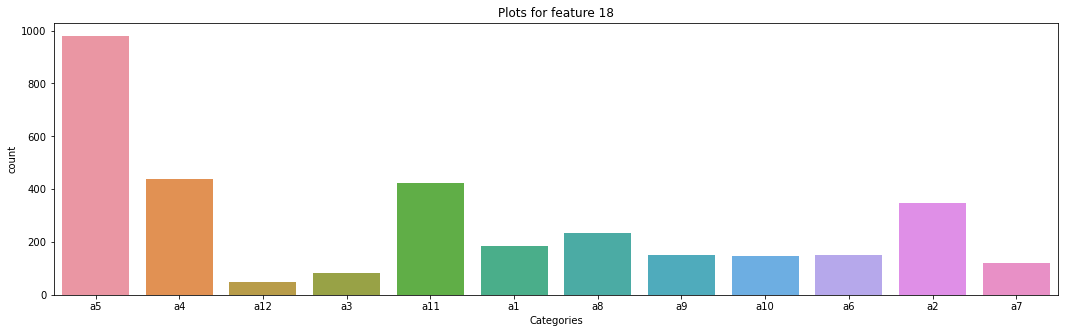

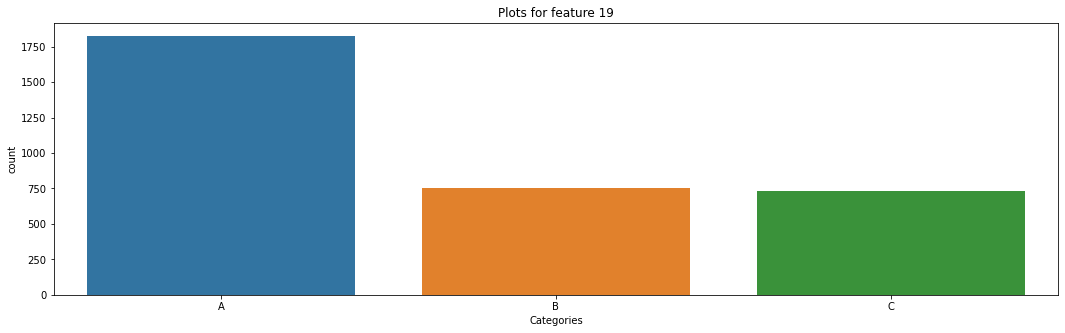

In [16]:
numerical_visualization(numeric_columns)
categorial_visualization(categorial_columns)

The histogram of features 3 and 20 looks like it comes from normal distribution because the data is scattering in the same distance around the mean value.

It looks like (from the boxplots) that in feature 7 and 8 we don't have outliers, unlike the other features.

From the categorial graphs we don't see any clear distribution in which the columns behave.

In [17]:
x.corr()

,0,3,4,5,7,8,9,10,11,13,14,15,17,20
0,1.000000,-0.051257,-0.006268,0.011623,-0.037407,0.053481,-0.008023,0.191626,-0.027766,-0.016854,-0.089947,0.020463,0.008596,0.036995
3,-0.051257,1.000000,0.030136,0.026394,0.564371,-0.025817,0.530849,-0.029670,0.253524,0.009232,0.021081,-0.011583,0.021307,0.019273
4,-0.006268,0.030136,1.000000,0.071435,0.059355,-0.112610,0.051318,-0.005272,-0.008416,0.061269,0.033575,-0.037153,0.093653,0.008748
5,0.011623,0.026394,0.071435,1.000000,0.036274,-0.132258,0.022318,-0.002149,-0.009642,-0.168503,0.043804,-0.035706,0.914885,0.040077
7,-0.037407,0.564371,0.059355,0.036274,1.000000,-0.062272,0.924564,-0.012758,0.402000,-0.003593,0.001389,-0.016126,0.032404,0.003388
8,0.053481,-0.025817,-0.112610,-0.132258,-0.062272,1.000000,-0.001278,0.008243,-0.057497,-0.075765,-0.080919,0.024416,-0.164589,0.000306
9,-0.008023,0.530849,0.051318,0.022318,0.924564,-0.001278,1.000000,-0.003928,0.328333,-0.028760,-0.003312,-0.012782,0.014455,0.002387
10,0.191626,-0.029670,-0.005272,-0.002149,-0.012758,0.008243,-0.003928,1.000000,-0.006427,0.024210,0.010806,0.011956,0.001506,0.007593
11,-0.027766,0.253524,-0.008416,-0.009642,0.402000,-0.057497,0.328333,-0.006427,1.000000,-0.019884,-0.001800,0.004750,-0.005973,0.006782
13,-0.016854,0.009232,0.061269,-0.168503,-0.003593,-0.075765,-0.028760,0.024210,-0.019884,1.000000,0.002569,-0.013797,-0.184169,-0.025422


This is matrix for correlation between the features

Let's make it a heat map for better spoting the correlations by visualization:

<function matplotlib.pyplot.show(close=None, block=None)>

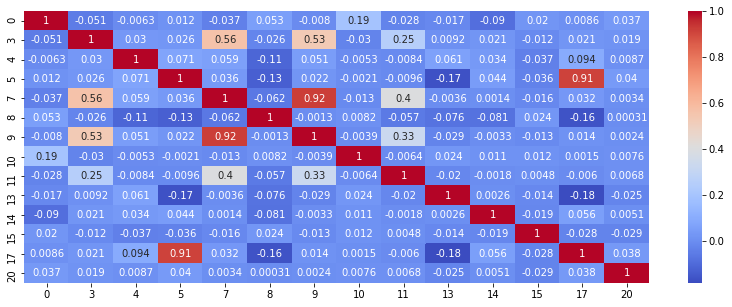

In [23]:
plt.figure(figsize=(14,5))
sns.heatmap(x.corr(), annot=True,cmap='coolwarm')
plt.show

We can see strong correlation between (17,5), (9,7)

In [198]:
dat =train.groupby(['2']).size()
print(dat)
print('The most commen value in the column 2 is: ',dat.idxmax())

2
-1d     17633
100d       18
101d       13
102d       19
103d       11
        ...  
96d        28
97d        34
98d        35
99d        24
9d          6
Length: 491, dtype: int64
The most commen value in the column 2 is:  -1d


### Pre Processing

In [199]:
def remove_outlier(x,y):
    # Above this threshold we wouldn't make the removal.
    threshold=x.shape[0]*0.01
    # We are doing the outlier removal for numerical features
    for col in list(x.columns[x.dtypes != 'object']):
        #number of rows that outside the 3 standard deviations
        num_of_rows = x[(np.abs(stats.zscore(x[[col]]))>3).all(axis=1)].shape[0]   
        if num_of_rows>0 and num_of_rows<threshold:
            print ('Number of outliers remove from column %s is: %d'% (col,num_of_rows))
            x= x[(np.abs(stats.zscore(x[[col]]))<3).all(axis=1)]
        
    y=y.loc[x.index]   
    return x, y

In [200]:
def standardization(df, standard_scaler=None, test=False):
    if not test:
        #We initialize our scaler
        standard_scaler=StandardScaler() 
        # We fit our scaler
        standard_scaler.fit(df) 
        # We transform our data using the scaler we have just fit or in case it's the test set we use the train's scaler
    scaled_df=standard_scaler.transform(df)          
    return scaled_df, standard_scaler

In [201]:
def remove_features(df,features_columns):
    cols = features_columns
    # The missing percentage from our dataset from part A
    missing_percentage=train.isnull().sum()/train.shape[0]
    # Loop through columns
    for column in cols:
        # If the missing percentage is higher than 75% we drop the feature
        if missing_percentage[column] > 0.75:
            del df[column]
    return df 

In [310]:
def fix_feature_2(df):
   #df['2']=df['2'].replace(regex='NaN', value='-1d')
   df['2'] = df['2'].replace(np.nan, '-1d')
   df['2'] = df['2'].str.rstrip('d')
   df['2'] = df['2'].astype(np.int64)
   return df

In [203]:
def fill_median(df,numeric_columns):
    cols = numeric_columns
    # Loop through columns
    for column in cols:
        # Transfer column to independent series
        col_data = df[column]
        # Look to see if there is any missing numerical data
        missing_data = sum(col_data.isna())
        if missing_data > 0:
            # Get median and replace missing numerical data with median
            col_median = col_data.median()
            col_data.fillna(col_median, inplace=True)
            df[column] = col_data
    return df 

In [204]:
def fill_max_val(df,categorial_columns):  
    cols = categorial_columns
    # Loop through columns
    for column in cols:
        # Transfer column to independent series
        col_data = df[column]
        # Look to see if there is any missing numerical data
        missing_data = sum(col_data.isnull())
        if missing_data > 0:
            # Get median and replace missing numerical data with median
            col_max = (train.groupby(column).size()).idxmax()
            #print(column,col_max)
            col_data.fillna(col_max, inplace=True)
            df[column] = col_data
    return df 

In [205]:
def pairs_correlation_features(df,treshold):
    pairs_cor_features=[]      #initialization
    one_cor_feature=[]
    #Removing the correlation of each feature with itself
    cor1=df.corr().where(df.corr()<1)   
    #Features are correlated if the value in the correlation matrix is greater than the threshold value
    cor2=np.where(cor1>=treshold)
    print('We will examine a correlation relative to the threshold value of',treshold,'\n')
    for i in range((len(cor2[0]))):
        pair = (cor1.index[cor2[0][i]],cor1.index[cor2[1][i]])
        if set(pair) not in pairs_cor_features:
            one_cor_feature.append(pair[0])
            pairs_cor_features.append(set(pair))
            print ('Features',tuple(pair),'are correlated. The value in the correlation matrix is',round(cor1.loc[pair[0],pair[1]],3))
    print('\n')
    return one_cor_feature

In [206]:
def pca_numeric(df, pca=None, test=False, n_component=13):   
    if not test:
        pca=PCA(n_components=n_component)    #initialize PCA
        pca.fit(df)                           #fit the model with the data
        #percentage of variance explained by each of the selected components
        var=pca.explained_variance_ratio_
        print('total variance explained from the first n component is:', sum(var))
    df=pca.transform(df)                   #transform the model with the data
    return df, pca

def pca_categorial(df, pca=None, test=False, n_component=60):
    if not test:
        pca=PCA(n_components=n_component)    #initialize PCA
        pca.fit(df)                           #fit the model with the data
        #percentage of variance explained by each of the selected components
        var=pca.explained_variance_ratio_
        print('total variance explained from the first n component is:', sum(var))
    df=pca.transform(df)                   #transform the model with the data
    return df, pca



### PreProcessing for the train set

Feature 2 will replace the NaN values with -1d the most common value as we see in the exploration part, we gonna omit the value 'd'
Then, we will convert all cells of the feature to int64 type
removing features with percentage of null > 75%

Now we will find the highest correlation features
We will examine a correlation relative to the threshold value of 0.9 

Features ('5', '17') are correlated. The value in the correlation matrix is 0.9
Features ('7', '9') are correlated. The value in the correlation matrix is 0.935


Following the correlation process - features to drop are: ['5', '7']
Heat Map after deleting the correlated features:


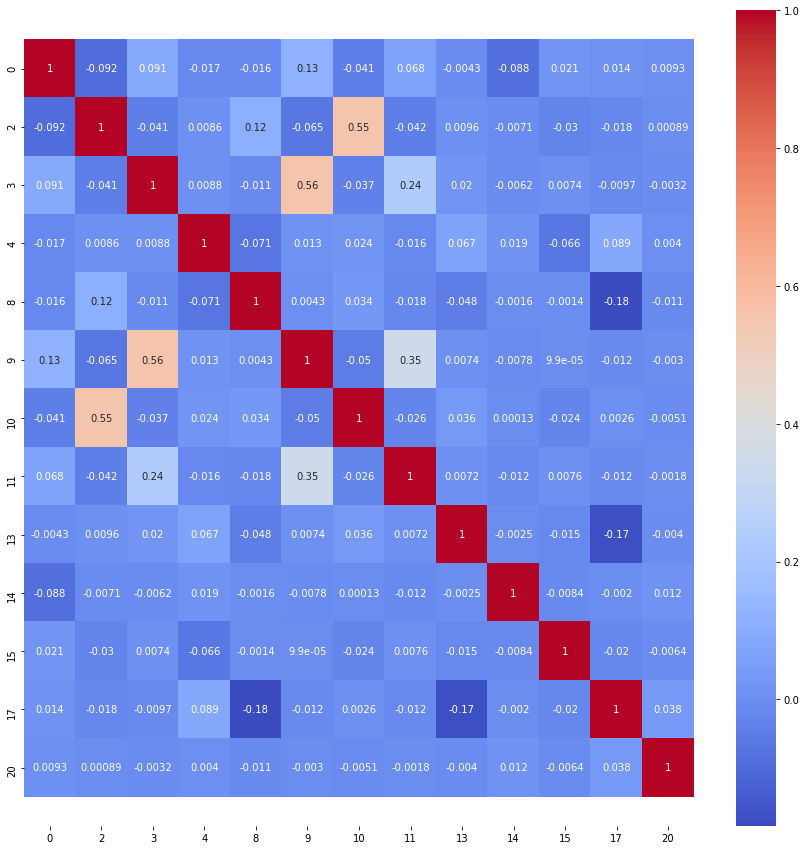


Perform the numeric outlier removal procces on the data

Send the train data to standardization process

Insert median value for blank numeric records and max val value for blank categorial records

Convert categorial features to binary martix
After dummys the number of catgorial columns is: 31

Send the train data to PCA process
Now the Train set is ready!
Number of samples: 21931 
Number of features: 44


(21931, 44)

In [315]:
x = train.loc[:,:'20'] 
y = pd.DataFrame(train['label'])
xcopy = x.copy()
ycopy = y.copy()
print ("Feature 2 will replace the NaN values with -1d the most common value as we see in the exploration part, we gonna omit the value 'd'")
print( "Then, we will convert all cells of the feature to int64 type")
xcopy=fix_feature_2(xcopy)
print("removing features with percentage of null > 75%")
features_columns=list(xcopy.columns)
remove_features(xcopy,features_columns)
print('\nNow we will find the highest correlation features') 
feature_to_drop=pairs_correlation_features(xcopy,0.9)    #find the correlated features we can drop from the data
print('Following the correlation process - features to drop are:',feature_to_drop)      
xcopy=xcopy.drop(feature_to_drop, axis=1)                     #remove the correlated features
print('Heat Map after deleting the correlated features:')
corr_mat = xcopy.corr()
plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_mat, annot = True,cmap= 'coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()  #plotting a headtmap of correlation
print("\nPerform the numeric outlier removal procces on the data")
xcopy,ycopy =remove_outlier(xcopy, ycopy)
print("\nSend the train data to standardization process")
xcopy[xcopy.columns[xcopy.dtypes != 'object']], standard_scaler = standardization(xcopy[xcopy.columns[xcopy.dtypes != 'object']])
print ("\nInsert median value for blank numeric records and max val value for blank categorial records")
new_numeric_columns=list(xcopy.columns[xcopy.dtypes != 'object'])
new_categorial_columns=list(xcopy.columns[xcopy.dtypes == 'object'])
xcopy=fill_median(xcopy,new_numeric_columns)
xcopy=fill_max_val(xcopy,new_categorial_columns)
print ("\nConvert categorial features to binary martix")
x_for_pca_categorial = pd.get_dummies(xcopy[xcopy.columns[xcopy.dtypes == 'object']])
print('After dummys the number of catgorial columns is:',x_for_pca_categorial.shape[1])
x_for_pca_numeric= xcopy.drop(new_categorial_columns, axis=1)
print ("\nSend the train data to PCA process")
x_train = np.concatenate([x_for_pca_numeric, x_for_pca_categorial], axis=1)
print('Now the Train set is ready!')
print('Number of samples:',x_train.shape[0],'\nNumber of features:',x_train.shape[1])
x_train.shape







### Preprocessing on the test set

The actions we performed on the test data:

Feature 2 will replace the NaN values with -1d the most common value as we see in the exploration part, we gonna omit the value 'd'
Then, we will convert all cells of the feature to int64 type

Now we will find the highest correlation features
We will examine a correlation relative to the threshold value of 0.9 

Features ('5', '17') are correlated. The value in the correlation matrix is 0.901
Features ('7', '9') are correlated. The value in the correlation matrix is 0.933


Following the correlation process - features to drop are: ['5', '7']
Heat Map after deleting the correlated features:


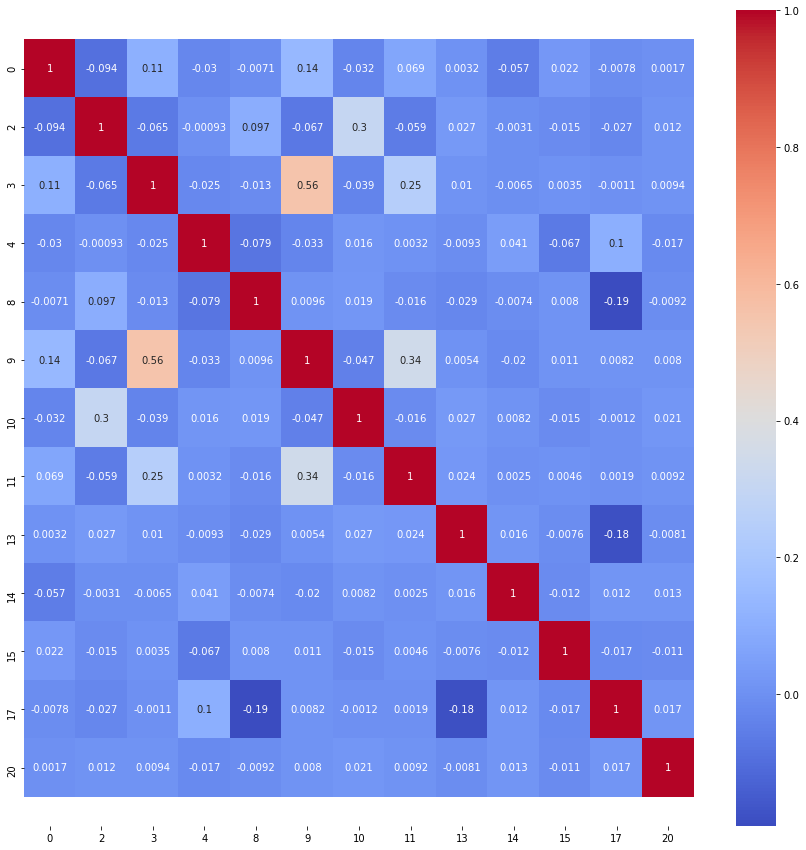


Send the test data to standardization process

Insert median value for blank numeric records and max val value for blank categorial records

Convert categorial features to binary martix
After dummys the number of catgorial columns is: 34

Send the test data to PCA process
Now the Test set is ready!
Number of samples: 7311 
Number of features: 47


In [317]:
test_without_target = pd.read_csv("test_without_target.csv") 
test = test_without_target.drop(columns=['Unnamed: 0'])
test=test.copy() 
print('The actions we performed on the test data:\n')
print ("Feature 2 will replace the NaN values with -1d the most common value as we see in the exploration part, we gonna omit the value 'd'")
print( "Then, we will convert all cells of the feature to int64 type")
test=fix_feature_2(test)

#performs correlated features removal procces
print('\nNow we will find the highest correlation features') 
feature_to_drop=pairs_correlation_features(test,0.9)    #find the correlated features we can drop from the data
print('Following the correlation process - features to drop are:',feature_to_drop)    
test=test.drop(feature_to_drop, axis=1)                     #remove the correlated features
print('Heat Map after deleting the correlated features:')
corr_mat = test.corr()
plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_mat, annot = True,cmap= 'coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()  #plotting a headtmap of correlation

print("\nSend the test data to standardization process")
test[test.columns[test.dtypes != 'object']], standard_scaler = standardization(test[test.columns[test.dtypes != 'object']])

print ("\nInsert median value for blank numeric records and max val value for blank categorial records")
new_numeric_columns=list(test.columns[test.dtypes != 'object'])
new_categorial_columns=list(test.columns[test.dtypes == 'object'])
test=fill_median(test,new_numeric_columns)
test=fill_max_val(test,new_categorial_columns)
print ("\nConvert categorial features to binary martix")
test_for_pca_categorial = pd.get_dummies(test[test.columns[test.dtypes == 'object']])

print('After dummys the number of catgorial columns is:',test_for_pca_categorial.shape[1])
test_for_pca_numeric= test.drop(new_categorial_columns, axis=1)

print ("\nSend the test data to PCA process")
#test_for_pca_numeric, p_numeric = pca_numeric(test_for_pca_numeric)
#test_for_pca_categorial , p_categorial = pca_categorial(test_for_pca_categorial)
test = np.concatenate([test_for_pca_numeric, test_for_pca_categorial], axis=1)

print('Now the Test set is ready!')
print('Number of samples:',test.shape[0],'\nNumber of features:',test.shape[1])
